## Introduction to the Ideas and Applications of Statistics (stat140)

## <span style="color:darkblue"> Class Notes: Unit 6 (Linear regression)

*The content of this notebook is based on modified materials from Open Intro Biostatistics (OIBiostat)*

#### The main idea

Linear regression provides methods for examining the association between quantitative variables.

<span style="color:violet"> Simple linear regression<span style="color:black">  is used to estimate linear relationships between a continuous *response* variable $y$ and a potential *predictor* variable $x$.

- The statistical m44odel for regression is based on the straight line relationship
  $$y = b_0 + b_1x $$
  

<span style="color:violet"> Multiple linear regression <span style="color:black"> is used to estimate linear relationships between a response variable $y$ and a set of possible predictors $x_1, x_2, \ldots, x_p$.

- The statistical model is based on 
  $$y = b_0 + b_1x_1 + b_2 x_2 + \cdots b_p x_p $$
  
The <span style="color:orange"> response variable<span style="color:black">  $y$ is sometimes referred to as the *dependent* variable, and the predictor variable $x$ is sometimes called the *independent* variable.


---
#### <span style="color:darkblue"> A. Simple Linear Regression

---
#### A.1 Examining relationships with scatterplots

#### Example: The PREVEND study

The Prevention of REnal and Vascular END-stage Disease (PREVEND) study examined risk factors for declining cognitive levels in adults.
  
  - Clinical and demographic information collected for 4,095 participants in the Netherlands between 2003 and 2006
  
  - Cognitive levels assessed using the Ruff Figural Fluency Test (RFFT).
  
      - Measures `nonverbal capacity for fluid and divergent thinking'   
      
      - Scores range from 0 to 175; higher scores are better.

Data from the study are in the *OI Biostat* dataset `prevend`.
  
We will work with a random sample of 500 participants.

In [3]:
require(oibiostat)
require(dplyr)
data(prevend)
head(prevend)
set.seed(5011)
prevend.samp = sample_n(prevend,size=500)

table(prevend.samp$Statin)

Casenr,Age,Gender,Ethnicity,Education,RFFT,VAT,CVD,DM,Smoking,⋯,Solubility,Days,Years,DDD,FRS,PS,PSquint,GRS,Match_1,Match_2
1,35,0,0,3,58,11,0,0,1,⋯,2,-1,-1,0,7,0.08101016,2,1,-1,-1
2,35,0,0,3,82,11,0,0,0,⋯,2,-1,-1,0,2,0.06069326,1,0,-1,-1
3,35,0,0,2,105,10,0,0,1,⋯,2,-1,-1,0,11,0.17047626,3,1,-1,-1
4,35,0,0,2,39,12,0,0,0,⋯,2,-1,-1,0,4,0.09005986,2,0,-1,-1
5,35,0,0,3,94,-1,0,0,0,⋯,2,-1,-1,0,2,0.07644714,2,0,-1,-1
6,35,0,0,1,40,9,0,0,0,⋯,2,-1,-1,0,3,0.10591498,2,0,-1,-1



  0   1 
385 115 

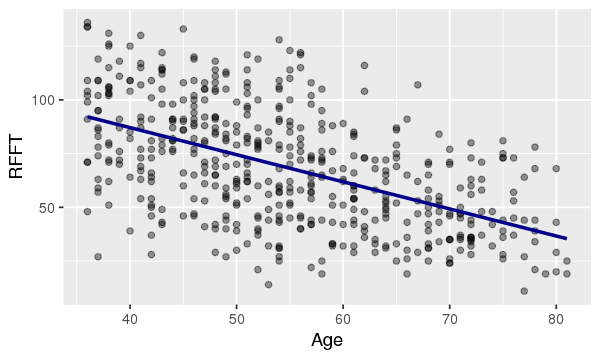

In [14]:
library(repr)
options(repr.plot.width=5, repr.plot.height=3)

require(ggplot2)
ggplot(data=prevend.samp,aes(x=Age, y=RFFT))+
    geom_point(alpha = 0.4) + 
    geom_smooth(method="lm",colour="darkblue",se=FALSE)

#### Age vs RFFT

The decline in RFFT with age appears linear.

A line might provide a useful summary of this association.

The following topics will be explored:

- Mechanics of adding a line

- Interpretation of a line added to a scatterplot

- Making predictions from regression

- Assumptions behind `validity' of the line

#### Assumptions for 'validity' of line

There are 4 assumptions for linear regression.

1. Linearity: data show a linear trend in change for response $y$ as a function of predictor $x$.

2. Constant variability: The variability of the response variable about the line remains roughly constant as the predictor variable changes.

3. Independent observations: The $(x,y)$ pairs are independent; i.e., values of one pair provide no information about other pairs. 

4. Approximate normality of *residuals*.  Definition coming later.

Special plots can be used to check these assumptions after a line has been calculated...


---
#### A.2 Finding a regression line using least squares, OI Biostat 6.2

#### Statistical model for least squares regression
  
The mean $\mu_Y = E(Y)$ of the response variable $Y$ varies continuously with values of the predictor variable $X$:

$$\mu_{Y} = \beta_{0} + \beta_{1}X$$
  
We can also write this for the $i^{th}$ pair $(x_{i},y_{i})$:

 $$y_{i} = \beta_{0} + \beta_{1}x_{i} + \varepsilon_{i},$$

where the error term $\varepsilon_{i}$ is assumed to be $N(0, \sigma^2)$ distributed.


#### Residuals in linear regression, Figure 6.3 OI Biostat

- In a dataset, the residuals are the vertical distances between the observed response variables and the value predicted by the line.


<img style="float: left", src="statinsResid.png",width="600",height="1200">

#### Estimating a line using least squares

Suppose data are given by $(x_1,y_1), (x_2, y_2), \ldots, (x_n, y_n)$.

Let $y = b_0 + b_1x$ be the equation of a line through the scatterplot.

For a point $(x_i, y_i)$, the predicted $y$-value on the line is denoted by

$$\hat{y}_i = b_0 + b_1x_i.$$

The difference $e_i = y_i - \hat{y}_i$ between the observed value $y_i$ and the predicted value $\hat{y}_i$ is called the residual at $(x_i, y_i)$.

The least squares regression line chooses $b_0$ and $b_1$ such that the sum of the squares of the residuals is minimized. 

  - In other words, $e_1^{2} + e_2^{2} + \cdots + e_n^{2}$ is minimized.

#### Coefficients of the line in least squares regression
  
Surprisingly, the slope $b_1$ and $y$-intercept $b_0$ in least squares regression can be calculated from summary statistics:
\begin{align*}
b_1 &= r\dfrac{s_y}{s_x}  \\
b_0 &= \overline{y} - b_1 \overline{x} \\
\end{align*}

$\overline{x}$, $\overline{y}$: sample means of $x$ and $y$.

$s_x$, $s_y$: sample standard deviations of $x$ and $y$.

$r$: correlation between $x$ and $y$.


#### Using R to calculate a least squares line.

The `R` function `lm()` calculates a least squares line from data.

In [16]:
lm(RFFT ~ Age, data=prevend.samp)


Call:
lm(formula = RFFT ~ Age, data = prevend.samp)

Coefficients:
(Intercept)          Age  
    137.550       -1.261  


The least squares line can be written as:

$$\widehat{\text{RFFT}} = 137.55 -(1.26)(\text{Age})$$


#### Interpreting a least squares regression line, OI Biostat 6.3

#### The slope describes the association

In the example above, we have that cognitive level (based on RFFT) is estimated to decrease by 1.26 for every unit (year) increase in Age.  

#### The esitmated coefficients can be used for prediction 

In the above example, the predictive cognitive level (based on RFFT) for someone who is 35 years old is $137.55-1.26*35 = 93.45$, while cognifitive level for someone who is 60 years old is predicted to be $137.55-1.26*60 = 61.95$.

####  Using $R^2$ to describe strength of fit

Correlation coefficient $r$ measures the strength of an association between two variables.

More common in regression to use $r^2$, usually written $R^2$.

In addition to being the square of the correlation coefficient, it is possible to show that

$$R^{2} = \dfrac{\text{variance of predicted $y$-values}}{\text{variance of observed $y$-values}}.$$

*Interpretation:* $R^2$ is the proportion of the variation in the response `explained' by the model.

It is also possible to show that

$$R^{2} = \dfrac{s^{2}_{y} - s_{\text{residuals}}^2}{s^{2}_{y}}.$$

$s^2_y$: variance of the response variable

$s_{\text{residuals}}^2$: is variance of the residuals.


---
#### A.3 Checking the assumptions in linear regression

The assumptions in linear regression are: (1) linearity, (2) constant variability, (3) independent observations, and (4) approximate normality of residuals.

  - The third assumption of independence among the $(x,y)$ pairs has to be checked in the design of the study.
  
  - The other assumptions can be examined using *residual plots* (assumptions 1 and 2) and *normal probability plots* (assumption 4).
      - Residual plots: scatterplots in which predicted values are on the $x$-axis and residuals are on the $y$-axis
      - Normal probability plots: theoretical quantiles for a normal versus observed quantiles



#### Least squares lines and residual plots, Figure 6.6 OI Biostat

<img style="float: left", src="sampleLinesAndResPlots.png",width="400",height="800">

#### Checking normality of the residuals

Normality of the residuals is fundamental to the underlying model

- $y_{i} = \beta_{0} + \beta_{1}x_{i} + \varepsilon_{i},$ 
  
since $\varepsilon_{i}$ is assumed to be $N(0,\sigma^2)$ distributed.

Approximate normality of the observed residuals ensures there will be no extreme outliers

Normality of the residuals is checked using normal probability plots, which are described in Section 3.2, *OI Biostat*

#### Normal probability plots

Normal probability plots are also called *quantile-quantile* plots.

To check normality using a normal probability plot for some data:

1.  Calculate the mean $\overline{x}$ and standard deviation $s_x$ 

2.  Plot the theoretical quantiles for a normal distribution with mean $\overline{x}$ and sd $s_x$ (horizontal axis) vs the observed quantiles from the data.

If the data are approximately normally distributed, the plot will be (approximately) a straight line.




#### Examples of normal probability plots, Figure 3.10 OI Biostat

<img style="float: left", src="normalExamples.png",width="800",height="1600">

#### Advantages of normal probability plots

- Unlike boxplots or histograms, normal probability plots do not group or clump data

- Easier to interpret in small samples  

- Show departures from normality in the tails of the distribtion


---
#### A.4 Categorical predictors with two levels

Regression seems most natural when both $x$ and $y$ are continuous, numerical data. However, regression is also widely used when $x$ is categorical, such as gender.

Let's re-examine the association between `ndrm.ch` and `sex` in the FAMuSS dataset using simple linear regression with `ndrm.ch` as the response (y) variable, and `sex` as the predictor (x) variable.

First, recall what we found from a boxplot and a two-group *t* test.

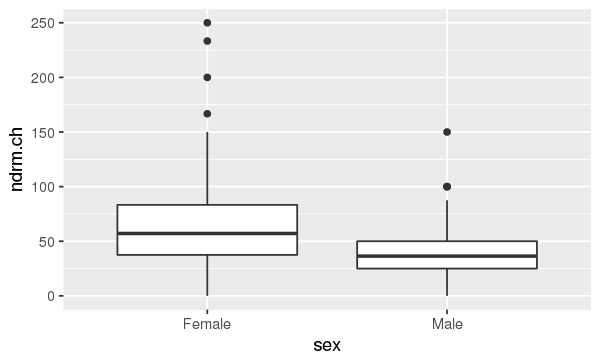

In [17]:
require(oibiostat)
data(famuss) 

require(ggplot2)
ggplot(data=famuss, aes(x=sex,y=ndrm.ch)) + geom_boxplot()

In [22]:
famuss %>%
    group_by(sex) %>% summarize(mean=mean(ndrm.ch,na.rm=TRUE))

lm(famuss$ndrm.ch ~ famuss$sex)

sex,mean
Female,62.92720
Male,39.23512



Call:
lm(formula = famuss$ndrm.ch ~ famuss$sex)

Coefficients:
   (Intercept)  famuss$sexMale  
         62.93          -23.69  


#### Interpreting the coefficients in sex vs ndrm.ch

The variable `sex` has been coded as a *factor* variable in *R*.

  - `sex` has two levels, `Female` or `Male`

Since every participant in the study is coded as either `Female` or `Male`, the regression shows:
  
- the mean for one of the categories as the *intercept*
  
     - This category is called the baseline category.

     - Here, `Female` is the baseline category.

- the difference between means of the two categories is the *slope*
  
    - In this case, it is the difference between male and female change in strength.

The mean for `Female`, calculated by either *t*-test or regression, is 62.93.

The mean for `Male` is found by adding the slope coefficient (-23.69) to 62.93.



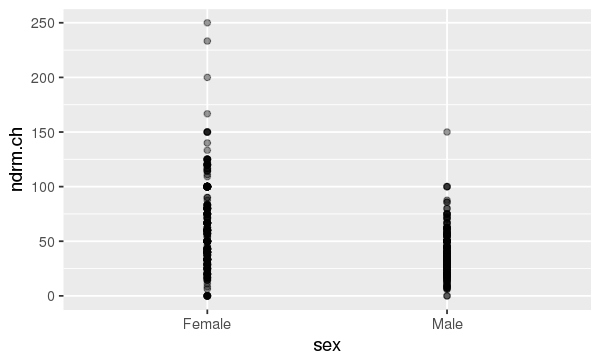

In [27]:
require(ggplot2)
ggplot(data=famuss,aes(x=sex, y=ndrm.ch))+
    geom_point(alpha = 0.4)

---
#### A.5 Outliers in regression

Outliers can also have a large influence in regression coefficients.

The plot below is a scatterplot of infant mortality (deaths in the first year of life per 1,000 live births) vs doctors per 100,000 members of population. (Data from US Census records.)

The plot illustrates the effect of an outlier:
  
  - District of Columbia is the influential point in the upper right.

- Red regression line includes DC, green line does not.

Note that association is not necessarily causation.



In [30]:
load("inf_mort_doctors.Rdata")
head(infant.mortality)

state,infmortality,doctorsper100000,perc_below_poverty,perc_unemp,violent_crime_rate
Alabama,9.0,218.2,15.7,5.0,448
Alaska,6.9,228.5,8.4,6.7,661
Arizona,6.4,209.7,14.7,5.5,483
Arkansas,8.5,203.4,17.3,5.1,529
California,5.0,268.7,13.3,7.2,523
Colorado,5.7,259.7,11.4,4.9,348


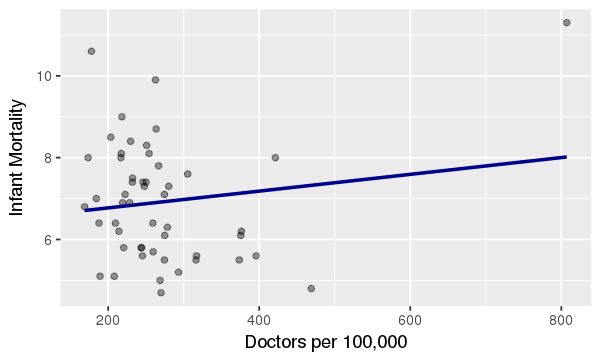

In [34]:
require(ggplot2)
ggplot(data=infant.mortality,aes(x=doctorsper100000, y=infmortality))+
    geom_point(alpha = 0.4) + 
    geom_smooth(method="lm",colour="darkblue",se=FALSE) +
    labs(x="Doctors per 100,000", y = "Infant Mortality")  

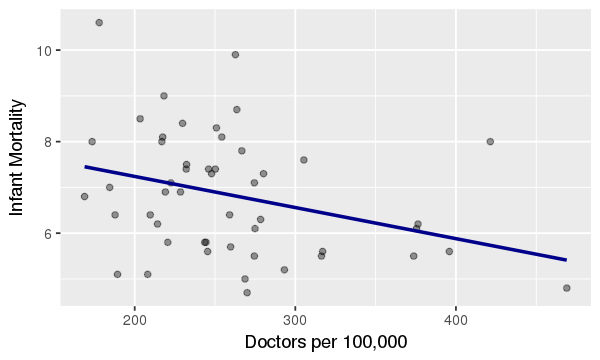

In [37]:
# remove outlier
infant.mortality.subset = infant.mortality %>% filter(doctorsper100000<700)

ggplot(data=infant.mortality.subset,aes(x=doctorsper100000, y=infmortality))+
    geom_point(alpha = 0.4) + 
    geom_smooth(method="lm",colour="darkblue",se=FALSE) +
    labs(x="Doctors per 100,000", y = "Infant Mortality")  

A point in a scatterplot  

- is said to have *high leverage* if the value of the predictor (the $x$ variable) is particularly high or low.

- is called an *outlier* in regression if the point does not follow the linear trend in the data.

These definitions are less precise than the corresponding definition of outlier for single samples.

- Advanced courses in regression have more detailed definitions

- In this course, this is simply something to be aware of. Check for any obvious examples in scatterplots


#### A.6 Statistical inference with simple linear regression, OI Biostat 6.4

#### The model for statistical inference

Least squares provides a way to estimate the population parameters in the model

$$ y = \beta_0 + \beta_1x + \varepsilon$$

The slope of the least squares line, $b_1$, is an estimate of the population slope, $\beta_1$.

The intercept of the least squares line, $b_0$, is an estimate of the population intercept, $\beta_0$.

#### Testing hypotheses with regression

In regression, hypotheses are typically about the slope, $\beta_1$:

  - $H_0: \beta_1 = 0$, the $x$ and $y$ variables are not associated

  - $H_A: \beta_1 \neq 0$, the $x$ and $y$ variables are associated

The *t*-statistic has $df = n - 2$, where $n$ is the number of ordered pairs in the dataset.

$$t = \dfrac{b_1}{\text{s.e.}(b_1)} $$

A 95% confidence interval for the slope $\beta_1$ is given by

$$b_1 \pm t^\star \text{s.e}(b_1),$$

where $t^\star$ is the point with 0.025 area to its right, on a *t* distribution with $n - 2$ degrees of freedom.

Statistical software like `R` is typically used to obtain $t$-statistics and $p$-values for inference with regression, since calculating the standard error via formulas can be cumbersome.

The formulas are shown on p. 233 of *OI Biostat*.

#### Returning to the example above (assuming all linear regression assumptions are met)...

In [38]:
lm(infmortality~doctorsper100000, data=infant.mortality.subset)


Call:
lm(formula = infmortality ~ doctorsper100000, data = infant.mortality.subset)

Coefficients:
     (Intercept)  doctorsper100000  
        8.599061         -0.006797  


In [39]:
summary(lm(infmortality~doctorsper100000, data=infant.mortality.subset))


Call:
lm(formula = infmortality ~ doctorsper100000, data = infant.mortality.subset)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.2124 -0.9380 -0.1779  0.8077  3.2101 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       8.599061   0.760333  11.310 3.87e-15 ***
doctorsper100000 -0.006797   0.002837  -2.395   0.0206 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.278 on 48 degrees of freedom
Multiple R-squared:  0.1068,	Adjusted R-squared:  0.08817 
F-statistic: 5.738 on 1 and 48 DF,  p-value: 0.02055


The `R` output from the `lm()` function gives us the estimate ($b_1 = -0.006797$) of association. The `summary()` function gives us the t-statistic ($t=-2.395$) and p-value ($p=0.02064$) for a test of the null hypothesis of no association between $x$ and $y$ ($H_0:\beta_1=0$).  

In this example, we reject the null (as $p<0.05$) and conclude that there is an association between doctors per 100,000 and infant mortality rate. 

---
#### <span style="color:darkblue"> B. Multiple Regression

---
#### B.1 Multiple regression motivation

#### Example: Cognitive levels and statin use

Statins are a class of drugs widely used to lower cholesterol.

If followed, recent guidelines for prescribing statins would lead to statin use in

- all men over 60 years of age   

- half of all Americans ages between 40 and 75

A few small studies have suggested that statins may be associated with lower cognitive ability.

The PREVEND study collected data on statin use as well as other demographic factors.

In [49]:
stat = factor(prevend.samp$Statin,levels = c(0, 1), labels = c("NonUser", "User"))
summary(lm(RFFT ~ stat, data=prevend.samp))


Call:
lm(formula = RFFT ~ stat, data = prevend.samp)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.714 -22.714   0.286  18.299  73.339 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   70.714      1.381  51.212  < 2e-16 ***
statUser     -10.053      2.879  -3.492 0.000523 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 27.09 on 498 degrees of freedom
Multiple R-squared:  0.0239,	Adjusted R-squared:  0.02194 
F-statistic: 12.19 on 1 and 498 DF,  p-value: 0.0005226


The regression suggests that statin use is significantly associated with lower cognitive ability. However... let's take a closer look at the data using some visualization tools...

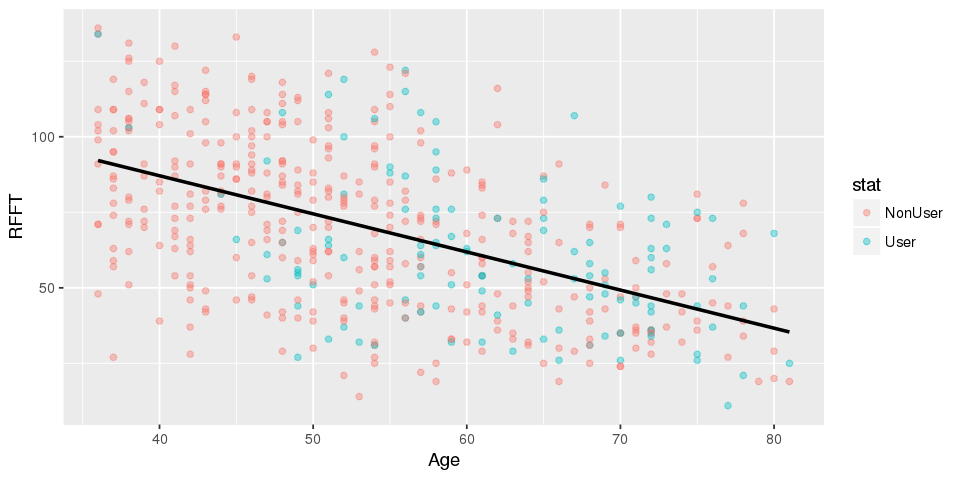

In [65]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(data=prevend.samp,aes(x=Age, y=RFFT,colour=stat))+
    geom_point(alpha = 0.4) + 
    geom_smooth(method="lm",colour="black",se=FALSE)

- The plot shows that older participants tend to use statins.

- The analysis in above showed that increased age was associated with lower cognitive ability.

- Perhaps age is the real culprit behind lower cognitive ability!

A <span style="color:orange"> confounder <span style="color:black">  is a variable associated with both the response variable and a predictor of primary interest.

  - Multiple regression can help with identifying confounders.


---
#### B.2 The model for multiple regression

*Multiple linear regression* is used to estimate linear relationships between a response variable $y$ and a set of possible predictors $x_1, x_2, \ldots, x_p$. The statistical model is based on 
  
 $$y = b_0 + b_1x_1 + b_2 x_2 + \cdots b_p x_p$$

Multiple regression is an extension of simple linear regression; in both settings, the parameters in the model are estimated by minimizing the sum of the squared residuals.

  - simple regression: $Y = \beta_0 + \beta_1X + \epsilon$
  - multiple regression: $Y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_pX_p + \epsilon$

#### Interpretation of coefficients

The mathematical interpretation of the coefficients is similar to that in simple linear regression.

- The coefficient $b_j$ of a variable $x_j$ is the predicted change in $y$ corresponding to a one unit change in $x_j$, if the values of *no other variables* change.

The practical interpretation is that a coefficient in multiple regression estimates the association between a response and that predictor, *after adjusting for the other predictors in the model*.

Consider our example...


In [54]:
summary(lm(RFFT ~ stat + Age, data=prevend.samp))


Call:
lm(formula = RFFT ~ stat + Age, data = prevend.samp)

Residuals:
    Min      1Q  Median      3Q     Max 
-63.855 -16.860  -1.178  15.730  58.751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 137.8822     5.1221  26.919   <2e-16 ***
statUser      0.8509     2.5957   0.328    0.743    
Age          -1.2710     0.0943 -13.478   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 23.21 on 497 degrees of freedom
Multiple R-squared:  0.2852,	Adjusted R-squared:  0.2823 
F-statistic: 99.13 on 2 and 497 DF,  p-value: < 2.2e-16


#### Interpreting the coefficients

- The coefficent of `Age` suggests that as age increases, `RFFT` decreases. Each year of increasing age is associated with a 1.27 point decline in predicted `RFFT`.

- The coefficient of `stat` suggests that at any age, use of statins is associated with slightly higher (but non-significantly so) `RFFT` score.

#### $R^2$ with multiple regression

As in simple regression, $R^2$ represents the proportion of variability in the response variable explained by the model.

As variables are added, $R^2$ always increases.

`R` reports two values in the `summary(lm())` output, the multiple R-squared and the adjusted R-squared.

  - multiple R-squared corresponds to $R^2$
  
  - adjusted R-squared accounts for the number of variables in the model and is preferred


---
#### B.3 Inference for the multiple regression model, OI Biostat 7.4

#### The model for statistical inference

The coefficients of a multiple regression model $b_0, b_1, ..., b_p$ are estimates of the population parameters in the model

$$y =  \beta_0 + \beta_1x_1 + ... + \beta_p x_p + \epsilon $$

#### Testing hypotheses about a coefficient

Let $b_k$ be one of the estimated coefficients:

  - $H_0: \beta_k = 0$, the variables $x_k$ and $y$ are not associated
  
  - $H_A: \beta_k \neq 0$, the variables $x_k$ and $y$ are associated
  
The $t$-statistic has $df = n - p - 1$, where $n$ is the number of observations on the response and predictor variables and $p$ is the number of predictors in the model.

$$t = \dfrac{b_k - \beta_k^0}{s.e.(b_k)} =  \dfrac{b_k}{s.e.(b_k)}$$

A 95% confidence interval for the slope $\beta_k$ is given by

$$b_k \pm t^{\star} s.e.(b_k), $$

where $t^{\star}$ is the point with 0.025 area to its right, on a $t$ distribution with $n - p - 1$ degrees of freedom.


---
#### B.4 Categorical predictors with several levels, OI Biostat 7.5

#### Single categorical predictor, two levels

In this setting, a linear regression estimates the difference in the mean response between the levels.

For example, the equation for the linear model predicting RFFT scores from statin use based on the data in `prevend.samp` is

$$\widehat{RFFT} = 70.71 - 10.05(StatinUser) $$

  - Average RFFT score for individuals not using statins is 70.71.
  
  - Average RFFT score for individuals using statins is 10.05 points lower than non-users, $70.71 - 10.05 = 60.66$.


#### What about more than two levels?

Is RFFT score associated with education?

The variable `Education` is coded with 4 levels, and indicates the highest level of education that an individual completed:

- 0: primary school

- 1: lower secondary school (in the Dutch system)

- 2: higher secondary education

- 3: university education


In [55]:
Education.factor = factor(statins.samp$Education,
                          levels = c(0, 1, 2, 3),
                          labels = c("Primary", "LowerSecond",
                                     "HigherSecond", "Univ"))

summary(lm(RFFT ~ Education.factor, data=prevend.samp))


Call:
lm(formula = RFFT ~ Education.factor, data = prevend.samp)

Residuals:
    Min      1Q  Median      3Q     Max 
-55.905 -15.975  -0.905  16.068  63.280 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    40.941      3.203  12.783  < 2e-16 ***
Education.factorLowerSecond    14.779      3.686   4.009 7.04e-05 ***
Education.factorHigherSecond   32.133      3.763   8.539  < 2e-16 ***
Education.factorUniv           44.964      3.684  12.207  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.87 on 496 degrees of freedom
Multiple R-squared:  0.3072,	Adjusted R-squared:  0.303 
F-statistic:  73.3 on 3 and 496 DF,  p-value: < 2.2e-16


#### Interpretation of the model with Education

The baseline category represents individuals who at most completed primary school (`Education = 0`).

  - `Intercept` is the estimated average RFFT score for these individuals
  
The coefficients represent the change in estimated average RFFT as compared to the baseline category.

  - An increase of 14.779 points is predicted for \texttt{LowerSecond}
  
  - An increase of 32.133 points is predicted for \texttt{HigherSecond}
  
  - An increase of 44.964 points is predicted for \texttt{Univ}

`Education` is significantly associated with `RFFT`.

Might `Education` be a confounder?


In [57]:
summary(lm(RFFT ~ stat + Education.factor, data=prevend.samp))


Call:
lm(formula = RFFT ~ stat + Education.factor, data = prevend.samp)

Residuals:
    Min      1Q  Median      3Q     Max 
-56.345 -15.577  -1.028  15.548  65.512 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                    42.179      3.345  12.610  < 2e-16 ***
statUser                       -3.157      2.477  -1.274 0.203088    
Education.factorLowerSecond    14.466      3.692   3.918 0.000102 ***
Education.factorHigherSecond   31.532      3.790   8.319 8.67e-16 ***
Education.factorUniv           44.166      3.734  11.828  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 22.86 on 495 degrees of freedom
Multiple R-squared:  0.3094,	Adjusted R-squared:  0.3039 
F-statistic: 55.45 on 4 and 495 DF,  p-value: < 2.2e-16


---
#### B.5 Interaction in regression

#### An important assumption

The multiple regression model

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon $$

assumes that when $x_j$ is changed by 1 unit and all other variables do not change, the predicted response changes by $\beta_j$, *regardless of the values of the other variables*.

An <span style="color:orange"> interaction <span style="color:black">  occurs when this assumption is not true, such that the effect of one explanatory variable $x_j$ on the response depends on the value of one or more other explanatory variables.

#### Example: Cholesterol vs. Age and Diabetes

Consider a model that predicts total cholesterol level from age and diabetes status (either diabetic or non-diabetic).\footnote{Total HDL cholesterol measured in mmol/L.}

$$ TotChol = \beta_0 + \beta_1(Age) + \beta_2(Diabetes) $$

If there is an interaction between age and diabetes status, then

  - The association of cholesterol level with age will be different for diabetics versus non-diabetics.

Let's explore this visually using a plot from a sample of the `NHANES` data.


In [69]:
require(NHANES)
data(NHANES)
head(NHANES)

set.seed(5011)
NHANESsamp = sample_n(NHANES,size=750)
NHANESsamp = NHANESsamp %>% filter(Age>=21)

ID,SurveyYr,Gender,Age,AgeDecade,AgeMonths,Race1,Race3,Education,MaritalStatus,⋯,RegularMarij,AgeRegMarij,HardDrugs,SexEver,SexAge,SexNumPartnLife,SexNumPartYear,SameSex,SexOrientation,PregnantNow
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51624,2009_10,male,34,30-39,409,White,NA,High School,Married,⋯,No,NA,Yes,Yes,16,8,1,No,Heterosexual,NA
51625,2009_10,male,4,0-9,49,Other,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
51630,2009_10,female,49,40-49,596,White,NA,Some College,LivePartner,⋯,No,NA,Yes,Yes,12,10,1,Yes,Heterosexual,NA
51638,2009_10,male,9,0-9,115,White,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Warning message:
“Removed 16 rows containing non-finite values (stat_smooth).”Warning message:
“Removed 16 rows containing missing values (geom_point).”

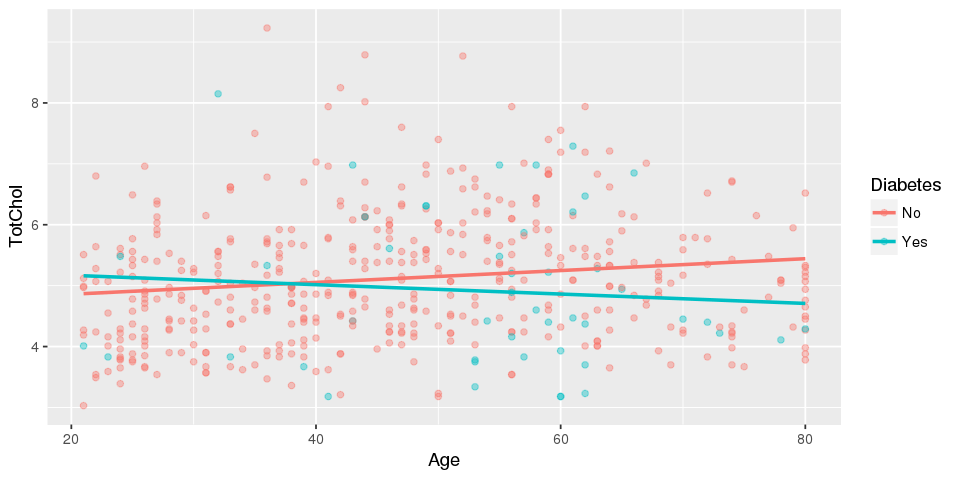

In [70]:
options(repr.plot.width=8, repr.plot.height=4)

ggplot(data=NHANESsamp,aes(x=Age, y=TotChol,colour=Diabetes))+
    geom_point(alpha = 0.4) + 
    geom_smooth(method="lm",se=FALSE)

The blue line shows the regression line for `TotChol` vs `Age` in diabetics.

The red line shows the regression line for `TotChol` vs `Age` in non-diabetics.



#### Numerical summaries of interaction

In [72]:
summary(lm(TotChol ~ Age*Diabetes, 
           data = NHANESsamp))


Call:
lm(formula = TotChol ~ Age * Diabetes, data = NHANESsamp)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9707 -0.7718 -0.1373  0.6357  4.2154 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)      4.664482   0.152407  30.605  < 2e-16 ***
Age              0.009724   0.003099   3.138  0.00181 ** 
DiabetesYes      0.659306   0.649320   1.015  0.31043    
Age:DiabetesYes -0.017421   0.011822  -1.474  0.14123    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.05 on 489 degrees of freedom
  (16 observations deleted due to missingness)
Multiple R-squared:  0.02389,	Adjusted R-squared:  0.0179 
F-statistic: 3.989 on 3 and 489 DF,  p-value: 0.007967


From the output, there is strong evidence of an interaction between age and diabetes status ($p=0.0233 < \alpha = 0.05$).

#### Model with estimates included

$$\widehat{TotChol} = 4.66 + 0.01(Age) + 0.66(DiabetesYes) - 0.017(Age \times DiabetesYes) $$

For non-diabetics (*DiabetesYes = 0*), predicted total cholesterol is:

\begin{align*}
\widehat{TotChol} =& 4.66 + 0.01(Age) + 0.66(0) - 0.017(Age \times 0) \\
=& 4.66 + 0.01(Age)
\end{align*}

For diabetics (*DiabetesYes = 1*), predicted total cholesterol is:

\begin{align*}
\widehat{TotChol} =& 4.66 + 0.01(Age) + 0.66(1) - 0.017(Age \times 1) \\
=& 4.66 + 0.66 + (0.01 - 0.017)(Age)
\end{align*}

*Some notes about models with interaction:*

- Sociologists/epidemiologists call interactions `effect modifiers'

- Interactions in models with many predictors can be complex, as well as interactions between numerical variables.



#### Summary uses of multiple linear regression

- Examine the association between a response and a predictor of particular interest after adjusting for variables that may influence that association.

    - Does the PREVEND study show that the use of a statin to lower cholesterol is associated with reduced cognition, or is that only an apparent association because older people both take statins and have reduced cognition?

- Examine the joint association of several predictors with a response.

    - What is the association between total cholesterol and age, gender, BMI, and the diagnosis of diabetes?

